Le but du TP est d'appliquer des algorythmes de classification au dataset 20 Newsgroups dataset.

In [2]:
#ici on trouve tous les imports nécessaires au fonctionnement du code
from sklearn.datasets import fetch_20newsgroups
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [3]:
#ici, on charge les données, en utilisant les jeux de données fournis par la librairie scikit, comme dans les précédents TP. On a choisit d'utiliser d'autres thèmes.
categories = ['comp.graphics', 'rec.motorcycles', 'sci.space', 'talk.politics.misc']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data
labels = newsgroups.target

print(f"Nombre de documents : {len(documents)}")
print(f"Catégories : {newsgroups.target_names}")

Nombre de documents : 3731
Catégories : ['comp.graphics', 'rec.motorcycles', 'sci.space', 'talk.politics.misc']


In [4]:
#avec la librairie NLTK, on transforme les documents texte en suite de tokens
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

tokenized_documents = []
for document in documents:
  tokens = word_tokenize(document)
  tokenized_documents.append(tokens)

tokenized_documents[0]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[')',
 'Many',
 'high-end',
 'graphics',
 'cards',
 'come',
 'with',
 'C',
 'source',
 'code',
 'for',
 'doing',
 'basic',
 'graphics',
 ')',
 'sorts',
 'of',
 'things',
 '(',
 'change',
 'colors',
 ',',
 'draw',
 'points/lines/polygons/fills',
 ',',
 'etc.',
 ')',
 '.',
 'Does',
 ')',
 'such',
 'a',
 'library',
 'exist',
 'for',
 'generic',
 'VGA',
 'graphics',
 'cards/chips',
 ',',
 'hopefully',
 'in',
 'the',
 ')',
 'public',
 'domain',
 '?',
 'This',
 'would',
 'be',
 'for',
 'the',
 'purpose',
 'of',
 'compiling',
 'under',
 'a',
 'non-DOS',
 ')',
 'operating',
 'system',
 'running',
 'on',
 'a',
 'standard',
 'PC',
 '.',
 'Check',
 'the',
 'server',
 'code',
 'for',
 'X11R5',
 '.',
 '(',
 'or',
 '``',
 'XFree86',
 "''",
 ')']

In [6]:
#ce code permet de réduire de dimension notre jeu de données en utilisant la technique de réduction de dimension TF-IDF, qui garde ici les 5000 premiers mots significatifs de nos données.
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_features = vectorizer.fit_transform(documents)

print(f"Dimensions de la matrice TF-IDF : {tfidf_features.shape}")

Dimensions de la matrice TF-IDF : (3731, 5000)


In [9]:
#ici, on applique la première classification avec 3 modèles différents, sur nos données réduites avec TF-IDF
#cette ligne permet de transformer la matrice TF-IDF en un tableau NumPy. Nous avons du ajouter cette transformation car nous rencontrons des erreurs avec le modèle Gaussian Naive Bayes
X = tfidf_features.toarray()

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

models = {
    "Gaussian Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel='linear', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{name} - Exactitude: {acc}, Score F1: {f1}")

Gaussian Naive Bayes - Exactitude: 0.8085676037483266, Score F1: 0.8088797323999751
SVM - Exactitude: 0.8728246318607764, Score F1: 0.873092705904294
Random Forest - Exactitude: 0.8232931726907631, Score F1: 0.8231292625091707


In [10]:
#ici on reprend les codes des TD précédents et on appliquer la réduction de dimensionnalité LSA

lsa = TruncatedSVD(n_components=100, random_state=42)
lsa_features = lsa.fit_transform(tfidf_features)

print(f"Dimensions des données après LSA : {lsa_features.shape}")

Dimensions des données après LSA : (3731, 100)


In [11]:
#maintenant, on réapplique les mêmes classifications sur la matrice de données réduite avec lSA

X_train_lsa, X_test_lsa, y_train, y_test = train_test_split(lsa_features, labels, test_size=0.2, random_state=42)

for name, model in models.items():
    model.fit(X_train_lsa, y_train)
    y_pred_lsa = model.predict(X_test_lsa)
    acc = accuracy_score(y_test, y_pred_lsa)
    f1 = f1_score(y_test, y_pred_lsa, average='weighted')
    print(f"{name} après LSA - Accuracy: {acc:.4f}, F1-score: {f1:.4f}")

Gaussian Naive Bayes après LSA - Accuracy: 0.7323, F1-score: 0.7355
SVM après LSA - Accuracy: 0.8581, F1-score: 0.8587
Random Forest après LSA - Accuracy: 0.8447, F1-score: 0.8454


Validation croisée pour Gaussian Naive Bayes :
Scores : [0.72361809 0.74036851 0.70351759 0.74204355 0.75      ]
Score moyen : 0.7319095477386934

Validation croisée pour SVM :
Scores : [0.84087102 0.85929648 0.8358459  0.82579564 0.85234899]
Score moyen : 0.8428316077029443

Validation croisée pour Random Forest :
Scores : [0.84924623 0.85092127 0.81072027 0.81909548 0.8557047 ]
Score moyen : 0.8371375895135633

Matrice de confusion pour Gaussian Naive Bayes:


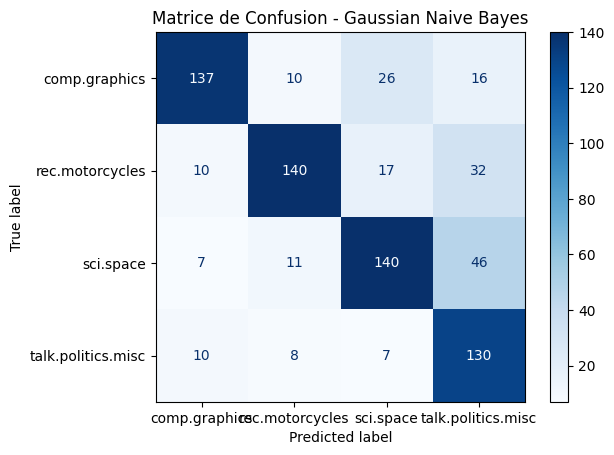

Matrice de confusion pour SVM:


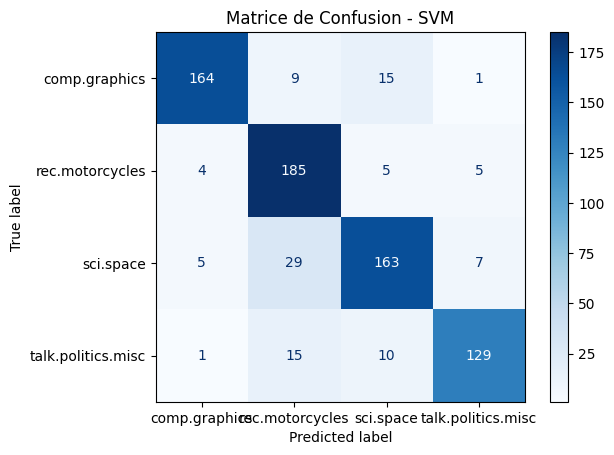

Matrice de confusion pour Random Forest:


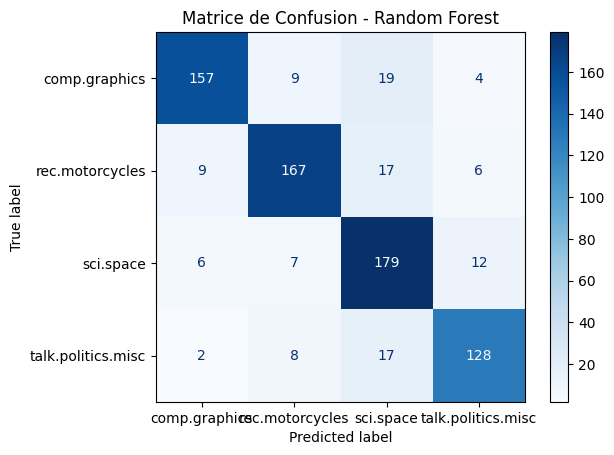

In [13]:
#pour les deux dernières parties, on utilise les données réduites après LSA, car si on s'en tient à la matrice TF-IDF, cela ne fonctionne pas car la validation croisée du modèle Gaussian Naive Bayes recquiert une dimension réduite à 100.
#en première lieu, on utilise la fonction cross_val_score de scikit-learn, qui réalise une validation croisée pour chaques modèles
cv_results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_lsa, y_train, cv=5, scoring='accuracy')
    cv_results[model_name] = scores
    print(f"Validation croisée pour {model_name} :")
    print(f"Scores : {scores}")
    print(f"Score moyen : {scores.mean()}\n")

class_names = newsgroups.target_names
#enfin, on utilise la fonction confusion_matrix pour afficher la matrice de confusion pour chaques modèles
for model_name, model in models.items():
    y_pred = model.predict(X_test_lsa)

    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

    print(f"Matrice de confusion pour {model_name}:")
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matrice de Confusion - {model_name}")
    plt.show()
